<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/Fisher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fisher’s linear discriminant

Fisher's Linear Discriminant Analysis (LDA) aims to find a linear combination of features that characterizes or separates two or more classes of objects or events. It is used for dimensionality reduction, classification, and visualization. In the context of dimensionality reduction, the goal is to project data onto a lower-dimensional space with good class-separability, retaining as much of the class discriminatory information as possible.

Let's say we have a dataset with \(n\) samples and each sample has \(d\) features. We can denote these features as \(x_i\) where \(i = 1, 2, ..., n\), and each \(x_i\) is a \(d\)-dimensional vector \((x_{i1}, x_{i2}, ..., x_{id})\). We have two classes, and we denote the means of the two classes as \(m_1\) and \(m_2\), and the mean of all samples as \(m\).

Fisher's criterion is defined as the ratio of the between-class variance to the within-class variance. Let's denote the between-class scatter as \(S_B\) and the within-class scatter as \(S_W\).

$$
S_B = (\mathbf{m}_1 - \mathbf{m}_2)(\mathbf{m}_1 - \mathbf{m}_2)^T
$$

$$
S_W = \sum_{i \in \text{class } 1} (\mathbf{x}_i - \mathbf{m}_1)(\mathbf{x}_i - \mathbf{m}_1)^T + \sum_{i \in \text{class } 2} (\mathbf{x}_i - \mathbf{m}_2)(\mathbf{x}_i - \mathbf{m}_2)^T
$$

Fisher's criterion (\(J\)) is then given by:

$$
J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}
$$

Here, \(\mathbf{w}\) is the linear combination of features we want to find. Essentially, we want to maximize \(J(\mathbf{w})\), which means we want to maximize the distance between the means of the projected classes, while minimizing the variance within each class.

By solving this maximization problem, the optimal \(\mathbf{w}\) can be found by:

$$
\mathbf{w} \propto S_W^{-1}(\mathbf{m}_1 - \mathbf{m}_2)
$$

This is the Fisher's Linear Discriminant. The resulting vector \(\mathbf{w}\) can be used to project data samples along the most discriminative direction. In practice, this is used for dimensionality reduction before classification, and is especially useful when the within-class frequency distributions are close to being normally distributed.

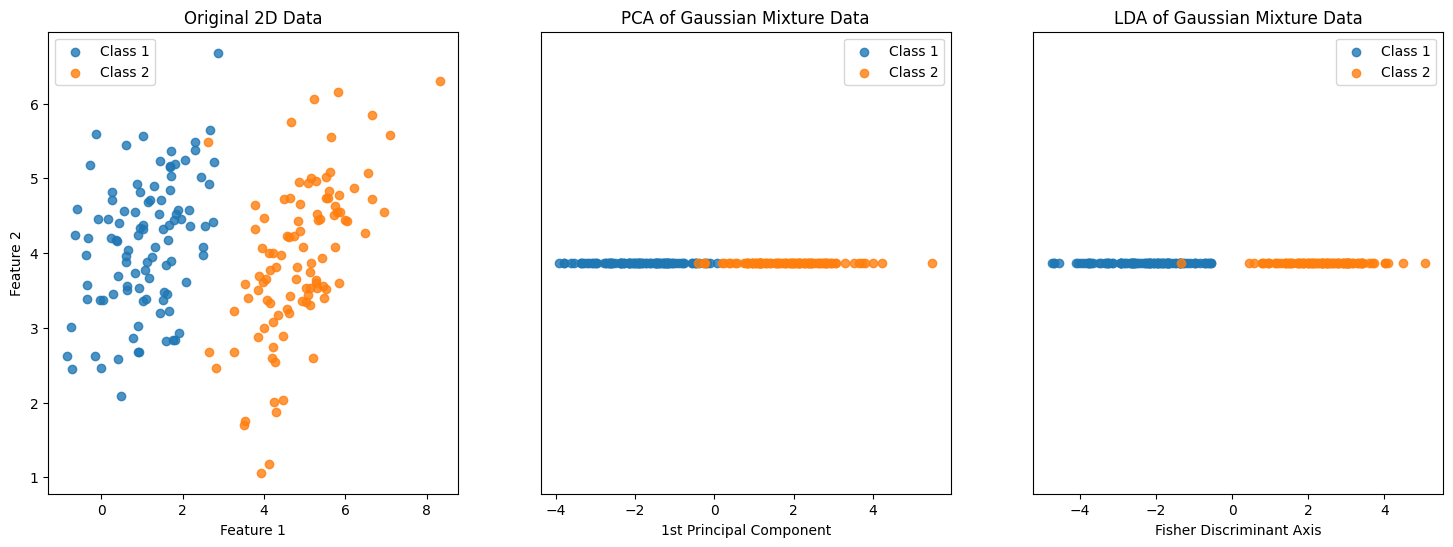

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Generating synthetic 2D data using a Gaussian Mixture
np.random.seed(42)
mean1, cov1 = [1, 4], [[1, 0.5], [0.5, 1]]
mean2, cov2 = [5, 4], [[1., 0.5], [0.5, 1.]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

X = np.vstack((data1, data2))
y = np.hstack((np.zeros(100), np.ones(100)))

# Applying PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Applying LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plotting
plt.figure(figsize=(18, 6))

# Plotting the original 2D data
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], alpha=0.8, label="Class 1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.8, label="Class 2")
plt.legend()
plt.title('Original 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting the PCA projection
plt.subplot(1, 3, 2)
plt.scatter(X_pca[y == 0], np.zeros(100), alpha=0.8, label="Class 1")
plt.scatter(X_pca[y == 1], np.zeros(100), alpha=0.8, label="Class 2")
plt.legend()
plt.title('PCA of Gaussian Mixture Data')
plt.xlabel('1st Principal Component')
plt.yticks([])

# Plotting the LDA projection
plt.subplot(1, 3, 3)
plt.scatter(X_lda[y == 0], np.zeros(100), alpha=0.8, label="Class 1")
plt.scatter(X_lda[y == 1], np.zeros(100), alpha=0.8, label="Class 2")
plt.legend()
plt.title("LDA of Gaussian Mixture Data")
plt.xlabel('Fisher Discriminant Axis')
plt.yticks([])

plt.show()


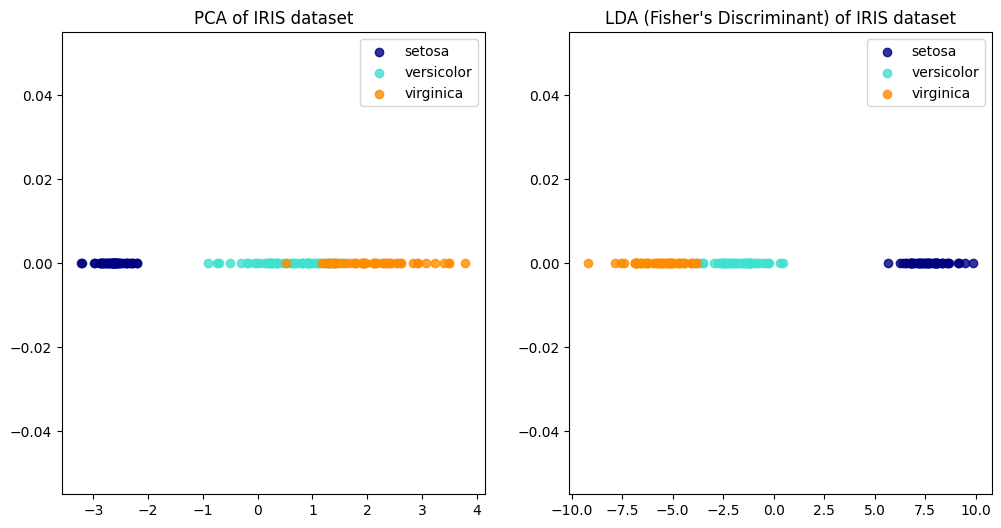

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Apply LDA (Fisher's Linear Discriminant)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plotting the 1D projection
plt.figure(figsize=(12, 6))

# Plotting the PCA projection
plt.subplot(1, 2, 1)
for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i], np.zeros_like(X_pca[y == i]), color=color, alpha=0.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

# Plotting the LDA projection
plt.subplot(1, 2, 2)
for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i], np.zeros_like(X_lda[y == i]), color=color, alpha=0.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("LDA (Fisher's Discriminant) of IRIS dataset")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


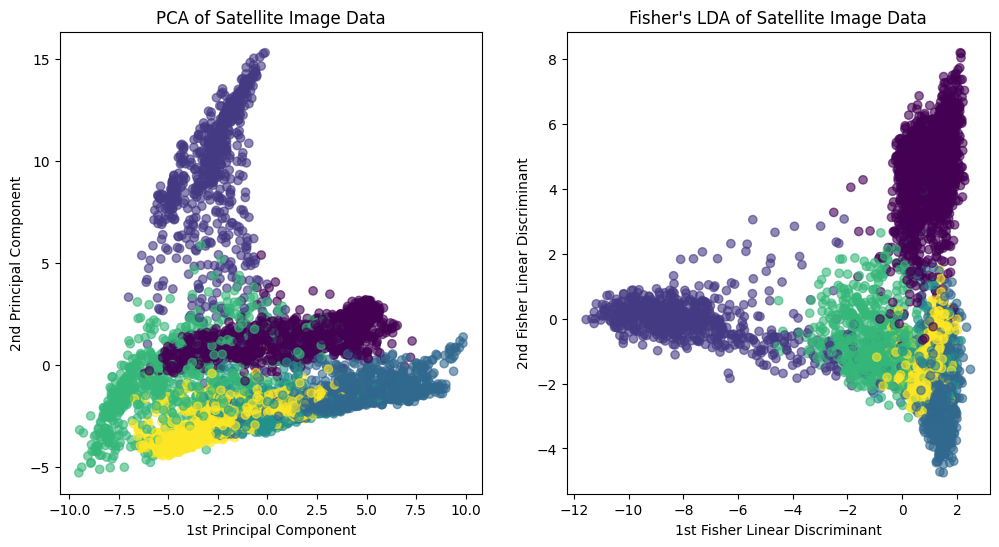

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Fetch the satellite_image dataset
X, y = fetch_openml('satellite_image', version=1, return_X_y=True, as_frame=False)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform Fisher's Linear Discriminant Analysis
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the PCA and LDA projections
plt.figure(figsize=(12, 6))

# Plot PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6, cmap='viridis')
plt.title('PCA of Satellite Image Data')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

# Plot Fisher's LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, alpha=0.6, cmap='viridis')
plt.title("Fisher's LDA of Satellite Image Data")
plt.xlabel('1st Fisher Linear Discriminant')
plt.ylabel('2nd Fisher Linear Discriminant')

plt.show()
